## Reinforcement Learning

#### Upper Confidence Bound - UBC

In [6]:
# Importing the required libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Extracting the dataset: 
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


#### EDA

In [4]:
# Shape of the dataset: 
df.shape

(10000, 10)

In [5]:
# Checking of nan in the dataset: 
df.isna().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

#### Algorithm

In [21]:
N = df.shape[0]
d = df.shape[1]
total_reward = 0
Ad_seleted = []
Ni_n = [0]*d
Ri_n = [0]*d
ub = 0
for i in range(0, N):
    max_ub = 0
    ad = 0
    for j in range(0,d):
        if Ni_n[j] > 0:
            ri_n = Ri_n[j]/Ni_n[j]
            delta = math.sqrt((3/2)*(math.log10(i+1)/Ni_n[j]))
            ub = ri_n + delta
        else:
            ub = 1e400
        if max_ub < ub:
            max_ub = ub
            ad = j
    Ad_seleted.append(ad)
    Ni_n[ad] = Ni_n[ad] + 1
    Ri_n[ad] = Ri_n[ad] + df.iloc[i,ad]
    total_reward = total_reward + df.iloc[i,ad]

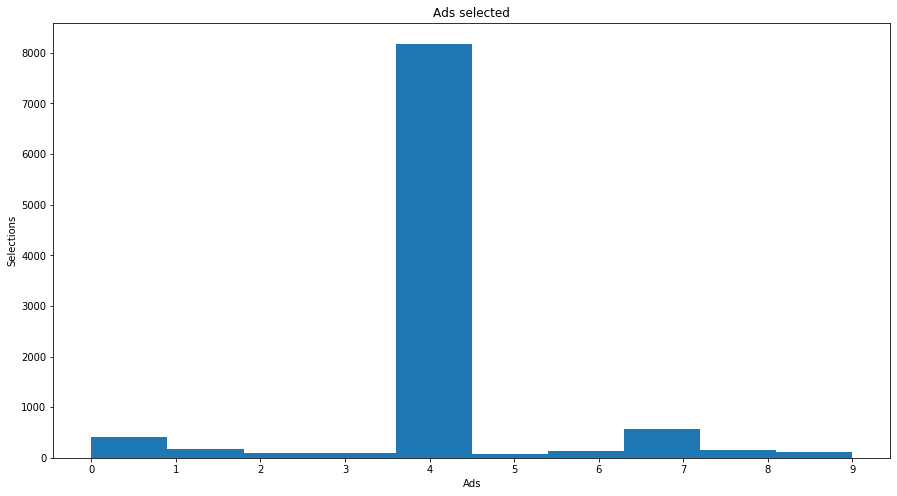

In [24]:
# Plotting to see the winner: 
plt.figure(figsize=(15,8))
plt.hist(Ad_seleted)
plt.xticks(range(0,10))
plt.title('Ads selected')
plt.ylabel('Selections')
plt.xlabel('Ads')
plt.show()

In [25]:
# starting from 1:
print('Ad selected : Ad 5')

Ad selected : Ad 5


In [26]:
# Total reward: 
print('Total Reward:', total_reward)

Total Reward: 2467


In [40]:
# Score of all the ads: 
score = np.array(Ad_seleted)

In [56]:
score_card = pd.DataFrame(np.unique(score,return_counts= True )).T

In [60]:
# Results:
score_card.columns = ['Ads', 'Socre']

In [61]:
# Final score: 
score_card

,Ads,Socre
0,0,406
1,1,182
2,2,93
3,3,99
4,4,8181
5,5,75
6,6,143
7,7,563
8,8,153
9,9,105
